Model heat produced as a function of body mass and work effort

Variables:
Body Mass (M)
Work Effort (W)
Heat Produced (H)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('data.csv', sep='|')

In [3]:
df

,M,W,H
0,76.2,156.8,3398
1,71.3,114.1,2988
2,69.6,142.6,3048
3,58.0,142.6,2781
4,74.6,142.6,2912
5,68.9,128.3,3135
6,69.1,142.6,3261
7,62.1,156.8,3030
8,68.7,128.3,3139
9,65.4,142.6,2996


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
M    37 non-null float64
W    37 non-null float64
H    37 non-null int64
dtypes: float64(2), int64(1)
memory usage: 1016.0 bytes


There are no null values

In [5]:
df.describe()

,M,W,H
count,37.000000,37.000000,37.000000
mean,68.156757,132.391892,3042.729730
std,4.985008,16.187759,250.727347
min,57.500000,97.100000,2615.000000
25%,65.400000,128.300000,2891.000000
50%,69.100000,129.400000,3001.000000
75%,70.800000,142.600000,3139.000000
max,79.800000,161.700000,3936.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CA33386C8>,
      dtype=object)

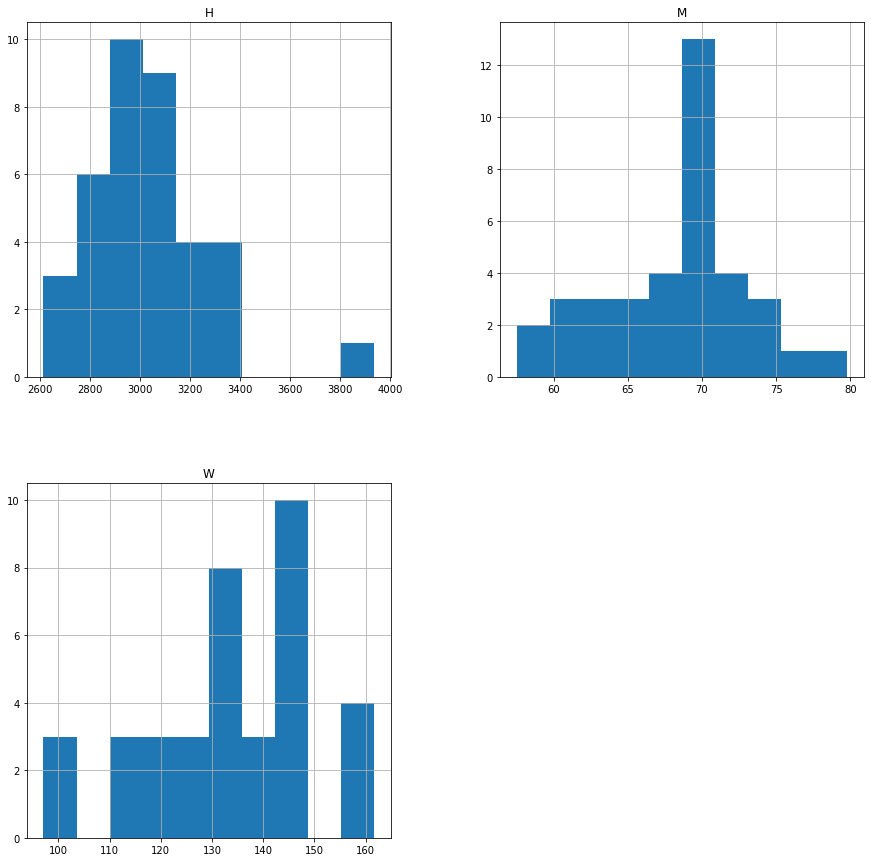

In [19]:
df.select_dtypes(include=np.number).hist(bins=10, figsize=(15, 15))

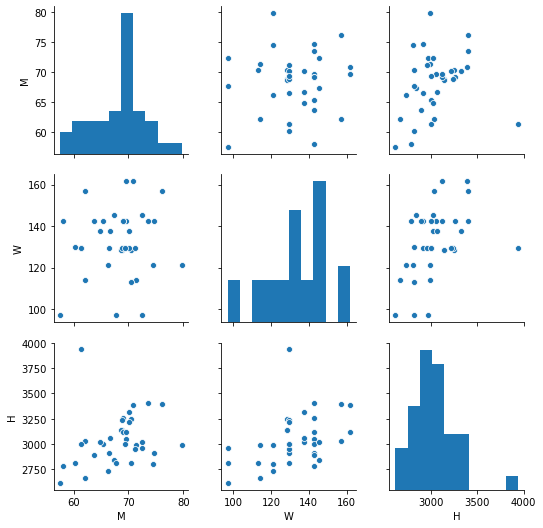

In [11]:
sns.pairplot(df.select_dtypes(include=np.number))

Heat produced is somewhat correlated to both Mass and Work, and Mass and Work do not seem to be correlated to each other.

In [12]:
df.corr()

,M,W,H
M,1.000000,0.097739,0.240472
W,0.097739,1.000000,0.417179
H,0.240472,0.417179,1.000000


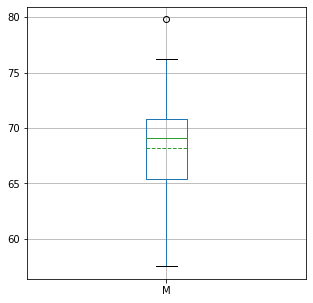

In [14]:
df.boxplot(column='M', by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=(5,5), layout=None, return_type=None, showmeans=True, meanline=True)

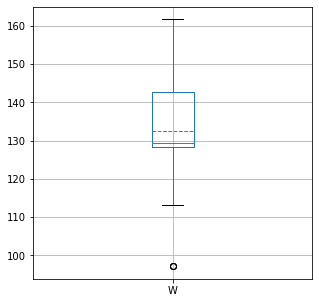

In [15]:
df.boxplot(column='W', by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=(5,5), layout=None, return_type=None, showmeans=True, meanline=True)

There are no significant outliers in Mass and work

In [57]:
df = df.astype('float64', copy=True, errors='raise')

In [21]:
df.dtypes

M    float64
W    float64
H    float64
dtype: object

In [22]:
import statsmodels.api as sm

In [28]:
X = df[['M', 'W']]
y = df['H']
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
result = model.fit()
result.summary()

d:\programfiles_x64\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      H   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     4.637
Date:                Sun, 05 Apr 2020   Prob (F-statistic):             0.0166
Time:                        01:06:31   Log-Likelihood:                -251.93
No. Observations:                  37   AIC:                             509.9
Df Residuals:                      34   BIC:                             514.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1536.5098    584.499      2.629      0.013     348.664    2724.355
M             10.1409      7.683      1.320      0.196      -5.472      25.754
W              6.1563      2.366      2.602      0.014       1.348      10.964
==============================================================================
Omnibus:                       38.250   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.988
Skew:                           2.317   Prob(JB):                     1.09e-30
Kurtosis:                      11.248   Cond. No.                     2.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficient of Mass is not significant

In [29]:
y_pred = result.predict(X_sm)
residual = (y - y_pred)

d:\programfiles_x64\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


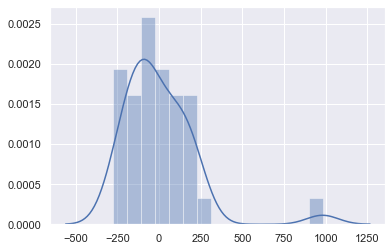

In [30]:
# plotting residuals
sns.set()
sns.distplot(residual, bins = 15)

The distribution is centered lower than 0 and has a noticable exception on the right tail 

In [36]:
residual.describe().apply(lambda x: format(x, 'f'))

count      37.000000
mean       -0.000000
std       222.243712
min      -275.369134
25%      -133.326426
50%       -34.904138
75%       115.952372
max       981.223027
dtype: object

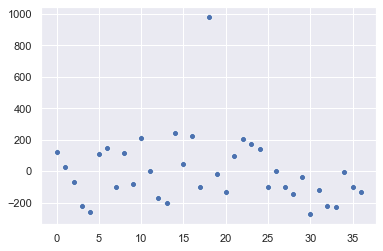

In [37]:
sns.scatterplot(x=residual.index, y=residual)

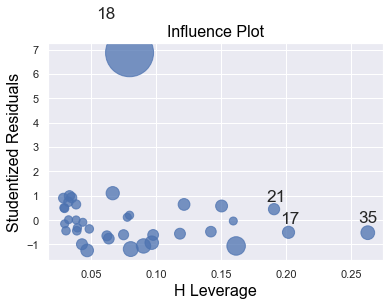

In [47]:
sm.graphics.influence_plot(result)
plt.show()

Data point 18 (index = 18) has a high influence but low leverage.

Refitting the model without the highly influential data point

In [60]:
X2 = df[~df.index.isin([18])][['M', 'W']]
y2 = df[~df.index.isin([18])]['H']
X2_sm = sm.add_constant(X2)
model2 = sm.OLS(y2, X2_sm)
result2 = model2.fit()
result2.summary()

d:\programfiles_x64\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      H   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     16.03
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.37e-05
Time:                        02:50:01   Log-Likelihood:                -229.64
No. Observations:                  36   AIC:                             465.3
Df Residuals:                      33   BIC:                             470.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        940.4456    390.433      2.409      0.022     146.104    1734.787
M             18.2828      5.142      3.556      0.001       7.821      28.744
W              6.2494      1.541      4.056      0.000       3.115       9.384
==============================================================================
Omnibus:                        2.079   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.214
Skew:                          -0.053   Prob(JB):                        0.545
Kurtosis:                       2.107   Cond. No.                     2.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared and Adjusted R-squared have incresed. F-statistic has increased. Over all model fit is significant.
Individual coefficients have changed and both are now significant.

In [61]:
y2_pred = result2.predict(X2_sm)
residual2 = (y2 - y2_pred)

d:\programfiles_x64\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


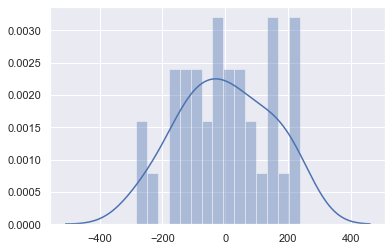

In [62]:
# plotting residuals
sns.set()
sns.distplot(residual2, bins = 15)

The distribution is centered very close to 0 and has a much more normal distribution. 

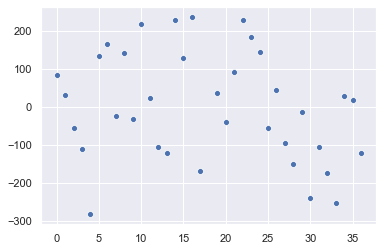

In [63]:
sns.scatterplot(x=residual2.index, y=residual2)